In [1]:
import numpy as np
from matplotlib import pylab as plt
%cd ..

/Users/andrey/MIPT_projects/M1P_6_sem/2023-Project-119


```yaml
my_pipeline:
  - rc
  - pdfs
  - plot

#%mldev nb_context
```

In [16]:
plt.rc('axes', titlesize=25, titleweight='bold') #fontsize of the title
plt.rc('axes', labelsize=20) #fontsize of the x and y labels
plt.rc('xtick', labelsize=20) #fontsize of the x tick labels
plt.rc('ytick', labelsize=20) #fontsize of the y tick labels
plt.rc('legend', fontsize=25) #fontsize of the legend
plt.rc('figure', figsize=(12, 8)) # figure size

#%mldev rc

In [23]:
def norm_pdf(x, mu=0, sigma=5):
    return 1./(sigma * np.sqrt(2 * np.pi)) * np.exp(-1./2 * ((x-mu)/sigma**2)**2)

def uniform_pdf(x_list, a=-2.5, b=2.5):
    ret = np.copy(x_list)
    for i, x in enumerate(x_list):
        if (a <= x) and (x <= b):
            ret[i] = 1./ (b-a)
        else:
            ret[i] = 0

    return ret

def f(x, t, func = norm_pdf):
    return t * func(t * x)

#%mldev pdfs

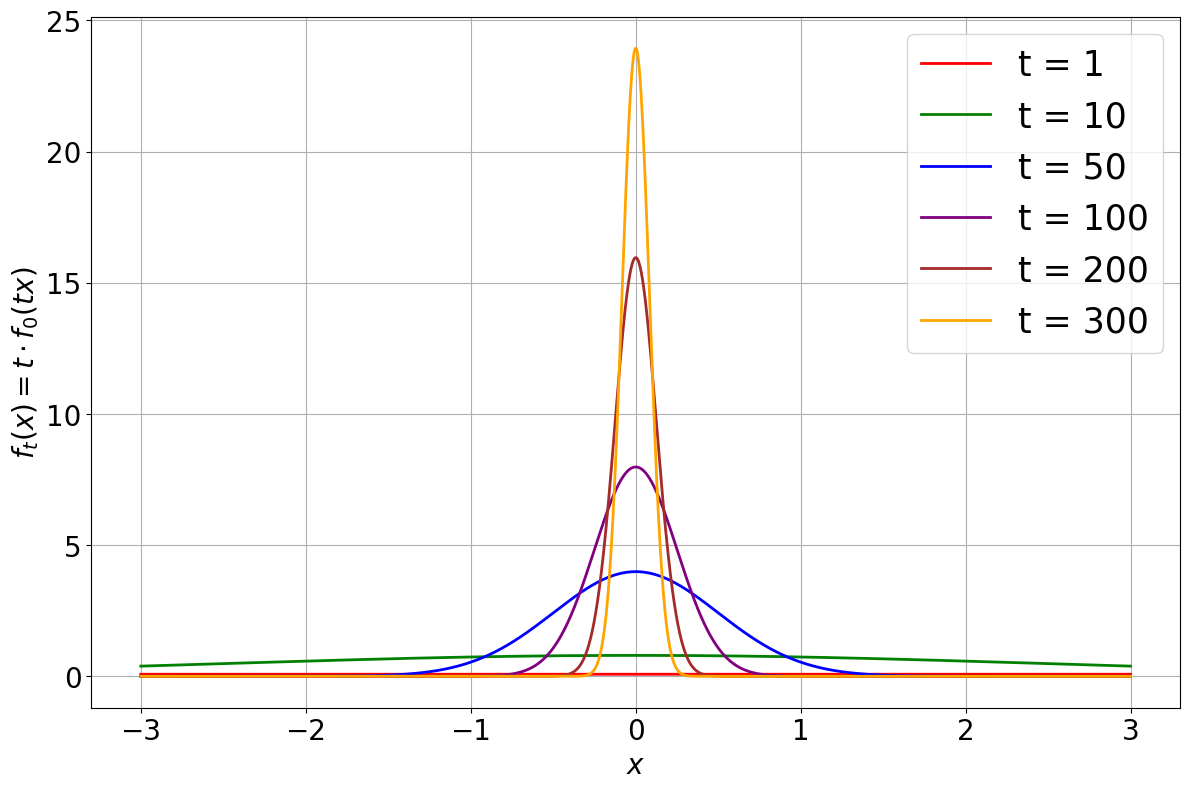

In [24]:
x = np.arange(-3, 3, 0.001)
colors = ['red', 'green', 'blue', 'purple', 'brown', 'orange']

pdf_name = 'Normal' # 'Normal' or 'Continuous'

if pdf_name == 'Normal':
    ts = [1, 10, 50, 100, 200, 300]
    pdf = norm_pdf
elif pdf_name == 'Continuous':
    ts = [1, 5, 10, 15, 25, 40]
    pdf = uniform_pdf
else:
    raise ValueError("Wrong pdf_name!")

for t, color in zip(ts, colors):
    plt.plot(x, f(x, t=t, func=pdf), color=color, 
             label=f"t = {t}", linewidth=2)
    plt.xlabel(r"$x$")
    plt.ylabel(r"$f_t(x) = t \cdot f_0(tx)$")

plt.grid()
plt.legend()
plt.tight_layout()
#plt.savefig(f"figures/Figure1_{pdf_name}.png")
plt.show()

#%mldev plot